**Installations**

In [1]:
!pip install --upgrade google-cloud-speech

     |████████████████████████████████| 112kB 8.5MB/s 
     |████████████████████████████████| 512kB 20.7MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 276kB 14.1MB/s 
     |████████████████████████████████| 122kB 18.4MB/s 
  Created wheel for proto-plus: filename=proto_plus-1.13.0-cp36-none-any.whl size=41593 sha256=c77bcd83bdd12c872da2a8d1132aefcd8041a67cdca4e7afc797053b5793394a
  Stored in directory: /root/.cache/pip/wheels/65/57/45/b5c1c1c29003f3670581d84356fa449e1133da93c15f1de364
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=1d954c08af8101d1b56b25641b41c45abc5b1293ac32045492f28a720de8bf1b
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built proto-plus pyyaml
ERROR: google-colab 1.0.0 has requirement google-auth~=1.17.2, but you'll have google-auth 1.23.0

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import io
import os

from google.cloud import speech_v1
# from google.cloud.speech import enums
from google.cloud.speech_v1 import types

from IPython.display import Audio

To get API Credentials - https://console.cloud.google.com/apis/credentials/serviceaccountkey

In [3]:
!ls /content/drive/'My Drive' 

'1543062800697_EAadhaar_446141722913_07072017123243_619843 (1).pdf'
 1543062800697_EAadhaar_446141722913_07072017123243_619843.pdf
 1.DesignThinkingOverview_Part_2.pptx
 1.DesignThinkingOverview_V2.pdf
 1f7909ce-a239-4ded-a3b6-3b3493b71d51.zip
 2ef7ab2f-30c8-4f20-a8ad-11840ce912cb.zip
 2.ProblemDiscovery.pptx
 AI-Assisted_Driving_System.pdf
'All India Postpoll 2014 Data file full and final_no_lable (1).gsheet'
'All India Postpoll 2014 Data file full and final_no_lable.csv'
'All India Postpoll 2014 Data file full and final_no_lable.gsheet'
 Ass2.xlsx
 Assignment_3.gdoc
'Assignment_3 | Genomics & IOT.gdoc'
 Assignment_5.gdoc
 Assignment-image-captioner-Anshumaan_Dash.zip
 Bot_Data.gdoc
 BRD_Final
'Captioning-HW (1).ipynb'
 Captioning-HW.ipynb
'CDC Material'
 Classroom
'Colab Notebooks'
 CollectionA
'Copy of AI-Assisted-Driving.gdoc'
'Copy of FinTech - UserCase - Study.gdoc'
'Cover_Letter Fractal.gdoc'
 Cover_Letter.pdf
 Cover_Letter_Vanshika_Hora.AI.pdf
'Dance videos '
 Data
 data1cr.pic

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/drive/My Drive/My First Project-e212143d5299.json'

In [5]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/drive/My Drive/My First Project-e212143d5299.json


**Converting Audios to Text**

In [166]:
def transcribe_gcs(gcs_uri):
    """Asynchronously transcribes the audio file specified by the gcs_uri."""
    from google.cloud import speech_v1p1beta1 as speech

    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=16000,
        language_code="en-IN",
        enable_speaker_diarization=True,
        diarization_speaker_count=2
    )

    operation = client.long_running_recognize(
        request={"config": config, "audio": audio}
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result(timeout=150)
    result=response.results[-1]
    alternative=result.alternatives[0]
    for result in response.results:
        print('Transcript: {}'.format(result.alternatives[0].transcript))

    for word_info in alternative.words:
        start_time = word_info.start_time
        end_time = word_info.end_time
        print(u"word: '{}', speaker_tag: {}, start_time: {}, end_time: {}".format(word_info.word, word_info.speaker_tag,start_time.total_seconds(),end_time.total_seconds()))
transcribe_gcs('gs://audio_bajaj/Vanshika-Balic-2012081835.wav')

Waiting for operation to complete...
Transcript: hello hello I am I talking to me sunchika hello mum who is it from Bajaj Allianz life insurance that I for enquiry on your life Bima policy that you are willing to buy I am here to help you and resolve the yes I did put Aquarius today and I wanted to purchase a policy for my son and daughter ok mam that is good so what is the ages what are the Ranger twins and there is there is also 1010 ok so I added a few mistakes you have in mind for your style and daughter like what they want to become in future right now I am not very much
Transcript: about it but yeah I keep talking to them and they say that they want to be an Interior ok mam engineer so having a few policies that would be good enough for your children like the live Bima policy would be good it covers till the education part of your children and they would be secured education is completed then we have future secure policy also recovered the path after education and they would be s

**Sentiment Score, Magnitude and Entity Extraction**

In [92]:
from google.cloud import language_v1
from google.cloud.language_v1 import types
from google.cloud.language_v1 import enums


def language_analysis(text):
    """
    Analyzing Sentiment in text file stored in Cloud Storage

    Args:
      gcs_content_uri Google Cloud Storage URI where the file content is located.
      e.g. gs://[Your Bucket]/[Path to File]
    """

    client = language_v1.LanguageServiceClient()
    document = types.Document(content=text,type=enums.Document.Type.PLAIN_TEXT)
    sent_analysis=client.analyze_sentiment(document=document)
    print(dir(sent_analysis))
    sentiment=sent_analysis.document_sentiment
    ent_analysis=client.analyze_entities(document=document)
    entities=ent_analysis.entities
    response = client.classify_text(document=document)
    return sentiment, entities,response

In [162]:
text="hello hello am I talking to miss Vanshika hello maam who is this I am from Bajaj allianz life insurance this is Anmol I saw your inquiry on your life beema policy that you are willing to buy so I am here to help you and resolve the inquiry yes actually I did put a query yesterday and I wanted to purchase a policy for my son and daughter okay maam that is good what is their ages what are their ages. They are twins and their ages is lets say ten ten okay maam so are there any future prospects you have in mind for your son and daughter like what they want to become in their future right now I am not very much clear about it but yes I keep talking to them and they say that they want to be an engineer okay maam engineer so I have in mind a few policies that would be good enough for your children like the life beema policy would be good it covers till the education part of your children and they would be secured till the education is completed then we have future secure policy also which covers the part after education and they would be secured till their retirement and also we have several other policies maam I can send you the details of the policies which I feel is apt for you can I send you the details maam sure maam you can send it on my email you can take my email then send me the brochure or something so that I can read the policy throughout and then if I will be having query I will get back to you okay maam I will send you the brochure on your email address which you have put in the chatbox right okay maam thank you for calling bajaj life insurance thank you maam thank you"
sentiment,entities,category=language_analysis(text)
print(sentiment.score,sentiment.magnitude)
for e in entities:
  print(e.name,e.salience)
for category in category.categories:
  print(u"Category name: {}".format(category.name))
  print(u"Confidence: {}".format(category.confidence))


['ByteSize', 'Clear', 'ClearExtension', 'ClearField', 'CopyFrom', 'DESCRIPTOR', 'DiscardUnknownFields', 'Extensions', 'FindInitializationErrors', 'FromString', 'HasExtension', 'HasField', 'IsInitialized', 'ListFields', 'MergeFrom', 'MergeFromString', 'ParseFromString', 'RegisterExtension', 'SerializePartialToString', 'SerializeToString', 'SetInParent', 'UnknownFields', 'WhichOneof', '_CheckCalledFromGeneratedFile', '_SetListener', '__class__', '__deepcopy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__unicode__', '_extensions_by_name', '_extensions_by_number', 'document_sentiment', 'language', 'sentences']
0.0 0.30000001192092896
Anmol 0.45247936248779297
hello maam 0.10523062199354

**WordCloud for Topic Analysis**

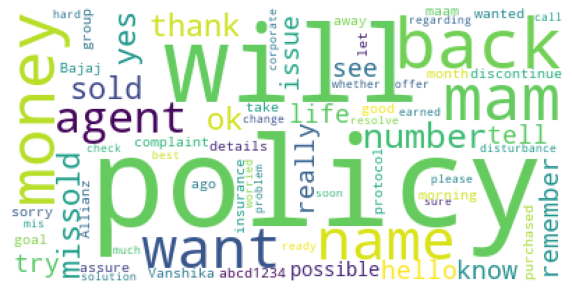

In [62]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
wc= WordCloud(background_color="white", max_words=2000, max_font_size=90, random_state=1, stopwords=STOPWORDS)
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.axis('off')
plt.show()

**Topic Modelling**

In [11]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [12]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [15]:
import random
import pandas as pd
calls=pd.read_csv('/content/Calls.csv')
text_data = []
for i in range(len(calls['Overall_Text'])):
    tokens = prepare_text_for_lda(calls['Overall_Text'][i])
    unwanted=['hello', 'talking','actually','become','right','clear','would','enough','several','something','throughout','thank','calling','want','bajaj','allianz','insurance','group','policy','remember','really','number','search','regard','whether','please','worry','possible','thanks','enlighten','clearly']
    tokens =[ele for ele in tokens if ele not in unwanted]
    print(tokens)
    text_data.append(tokens)

['vanshika', 'anmol', 'inquiry', 'beema', 'willing', 'resolve', 'inquiry', 'query', 'yesterday', 'purchase', 'daughter', 'twins', 'future', 'prospect', 'daughter', 'future', 'engineer', 'engineer', 'child', 'beema', 'cover', 'education', 'child', 'secure', 'education', 'complete', 'future', 'secure', 'cover', 'education', 'secure', 'retirement', 'details', 'details', 'email', 'email', 'brochure', 'query', 'brochure', 'email', 'address', 'chatbox']
['vanshika', 'missold', 'complain', 'money', 'morning', 'anmol', 'assure', 'agent', 'agent', 'purchase', 'behold', 'seven', 'eight', 'month', 'missold', 'discontinue', 'money', 'protocol', 'issue', 'database', 'three', 'details', 'sorry', 'disturbance', 'check', 'agent', 'grievance', 'change', 'money', 'money', 'earn', 'money', 'agent', 'missold', 'cooperate', 'offer', 'solution', 'resolve', 'problem']
['company', 'purchase', 'duration', 'years', 'check', 'going', 'maturity', 'amout', 'vanshika', 'database', 'three', 'triple', 'second', 'nomi

In [16]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [17]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.090*"money" + 0.073*"agent" + 0.056*"missold" + 0.021*"details"')
(1, '0.053*"secure" + 0.053*"email" + 0.053*"future" + 0.053*"education"')
(2, '0.011*"amount" + 0.011*"maturity" + 0.011*"bonus" + 0.011*"lakh"')
(3, '0.062*"amount" + 0.045*"maturity" + 0.036*"lakh" + 0.036*"claim"')
(4, '0.011*"amount" + 0.011*"maturity" + 0.011*"accord" + 0.011*"bonus"')


In [18]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=f8cd67b15efa06535ddcc674a2345a5514db5aa4e25507249ca9e674c8dca59e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


**Topic Visualisation**

In [19]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

**Testing on New Text data**

In [20]:
new_doc = 'Hi I have been mis-sell a policy, you agent has mis-sold me and also I want to check the premium amount of my policy'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(25, 1), (29, 1), (51, 1), (81, 1)]
[(0, 0.2901208), (1, 0.040006094), (2, 0.04002008), (3, 0.5898329), (4, 0.040020138)]


In [25]:
import csv
for i in text_data:
  word_count = {}
  for word in i:
      count = word_count.get(word, 0)
      count += 1
      word_count[word] = count
  print(word_count)

{'vanshika': 1, 'anmol': 1, 'inquiry': 2, 'beema': 2, 'willing': 1, 'resolve': 1, 'query': 2, 'yesterday': 1, 'purchase': 1, 'daughter': 2, 'twins': 1, 'future': 3, 'prospect': 1, 'engineer': 2, 'child': 2, 'cover': 2, 'education': 3, 'secure': 3, 'complete': 1, 'retirement': 1, 'details': 2, 'email': 3, 'brochure': 2, 'address': 1, 'chatbox': 1}
{'vanshika': 1, 'missold': 3, 'complain': 1, 'money': 5, 'morning': 1, 'anmol': 1, 'assure': 1, 'agent': 4, 'purchase': 1, 'behold': 1, 'seven': 1, 'eight': 1, 'month': 1, 'discontinue': 1, 'protocol': 1, 'issue': 1, 'database': 1, 'three': 1, 'details': 1, 'sorry': 1, 'disturbance': 1, 'check': 1, 'grievance': 1, 'change': 1, 'earn': 1, 'cooperate': 1, 'offer': 1, 'solution': 1, 'resolve': 1, 'problem': 1}
{'company': 1, 'purchase': 2, 'duration': 3, 'years': 2, 'check': 1, 'going': 1, 'maturity': 5, 'amout': 1, 'vanshika': 1, 'database': 1, 'three': 1, 'triple': 1, 'second': 1, 'nominee': 2, 'amount': 7, 'claim': 4, 'assure': 2, 'rupee': 3, 

**Call_1 Word Frequency File**

In [26]:
a_file = open("call1.csv", "w")
a_dict={'vanshika': 1, 'anmol': 1, 'inquiry': 2, 'beema': 2, 'willing': 1, 'resolve': 1, 'query': 2, 'yesterday': 1, 'purchase': 1, 'daughter': 2, 'twins': 1, 'future': 3, 'prospect': 1, 'engineer': 2, 'child': 2, 'cover': 2, 'education': 3, 'secure': 3, 'complete': 1, 'retirement': 1, 'details': 2, 'email': 3, 'brochure': 2, 'address': 1, 'chatbox': 1}
writer = csv.writer(a_file)
for key, value in a_dict.items():
    writer.writerow([key, value])

a_file.close()

**Call_2 Word Frequency File`**

In [27]:
a_file = open("call2.csv", "w")
a_dict={'vanshika': 1, 'missold': 3, 'complain': 1, 'money': 5, 'morning': 1, 'anmol': 1, 'assure': 1, 'agent': 4, 'purchase': 1, 'behold': 1, 'seven': 1, 'eight': 1, 'month': 1, 'discontinue': 1, 'protocol': 1, 'issue': 1, 'database': 1, 'three': 1, 'details': 1, 'sorry': 1, 'disturbance': 1, 'check': 1, 'grievance': 1, 'change': 1, 'earn': 1, 'cooperate': 1, 'offer': 1, 'solution': 1, 'resolve': 1, 'problem': 1}
writer = csv.writer(a_file)
for key, value in a_dict.items():
    writer.writerow([key, value])

a_file.close()

**Call_3 Word Frequency File**

In [28]:
a_file = open("call3.csv", "w")
a_dict={'company': 1, 'purchase': 2, 'duration': 3, 'years': 2, 'check': 1, 'going': 1, 'maturity': 5, 'amout': 1, 'vanshika': 1, 'database': 1, 'three': 1, 'triple': 1, 'second': 1, 'nominee': 2, 'amount': 7, 'claim': 4, 'assure': 2, 'rupee': 3, 'lakh': 4, 'purchasing': 1, 'agent': 1, 'double': 2, 'mature': 3, 'details': 1, 'screen': 1, 'accord': 3, 'fourth': 1, 'liable': 2, 'twenty': 3, 'mention': 2, 'bonus': 3, 'given': 1, 'confirm': 1, 'insure': 1, 'secure': 2, 'beema': 2, 'feature': 2, 'applicable': 1, 'include': 2, 'recieve': 1, 'coverage': 1, 'period': 1, 'happen': 2, 'within': 1, 'procedure': 1, 'premium': 3, 'filling': 1, 'available': 1, 'website': 1, 'elligible': 2, 'family': 1, 'deduction': 2, 'helpful': 1}
writer = csv.writer(a_file)
for key, value in a_dict.items():
    writer.writerow([key, value])

a_file.close()

In [1]:
!pip install pydub

In [3]:
from pydub import AudioSegment
phone_call=AudioSegment.from_file('/content/20200803-052603f965f037.wav')
phone_call.channels

1

In [4]:
phone_call_channels = phone_call.split_to_mono()
phone_call_channels